In [222]:
import cv2
import numpy as np
import math
from commonfunctions import *
from scipy.ndimage import interpolation as inter

In [253]:
def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.015 * peri, True)
        if area > max_area and len(approx) == 4:
            biggest = approx
            max_area = area
    return biggest

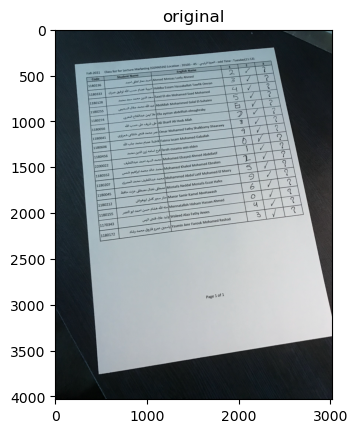

In [254]:
img = cv2.imread('../10.jpg')
show_images([img], ['original'])

img_original = img.copy()

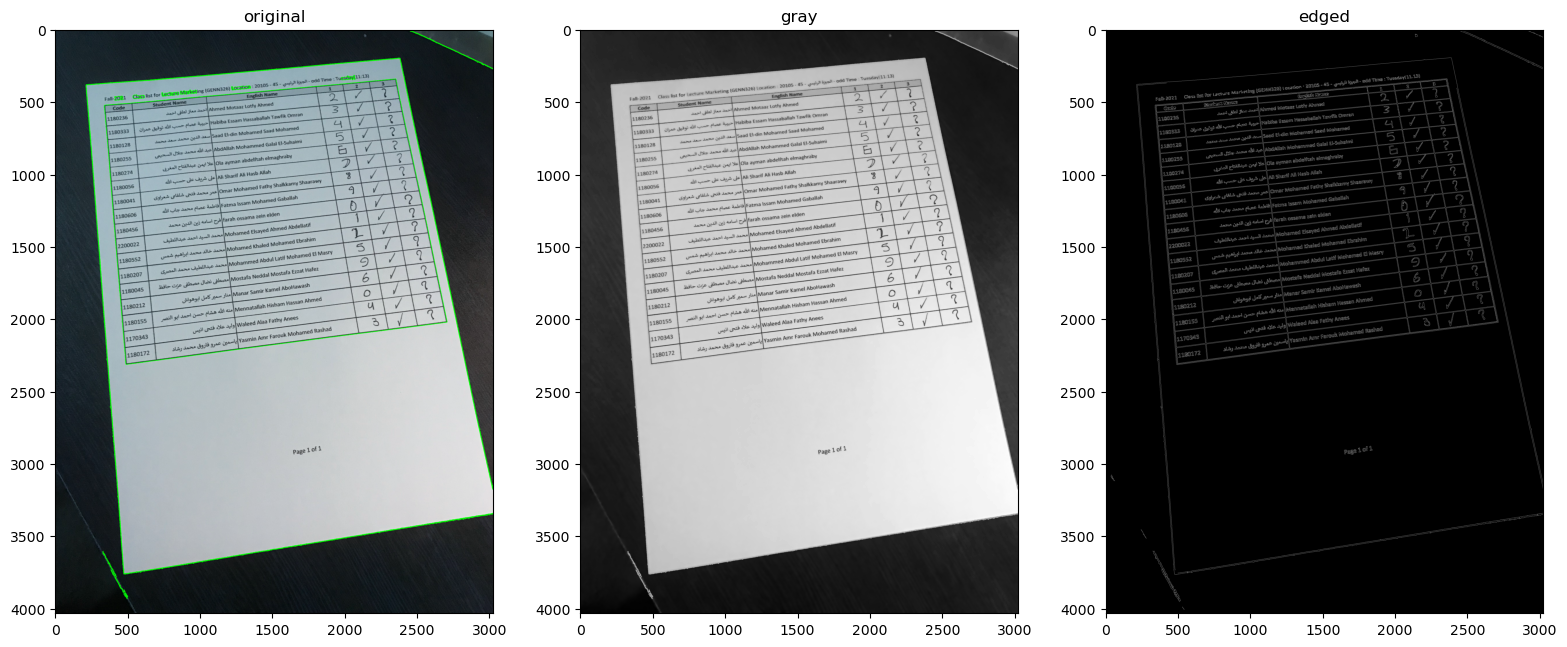

In [267]:
# Image modification
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 20, 30, 30)

# grad_x = cv2.Sobel(gray, -1, 1, 0)
# # Gradient-Y

# grad_y = cv2.Sobel(gray, -1, 0, 1)


# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)


# grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

edged = cv2.Canny(gray, 20, 120)
# edged = cv2.dilate(edged.copy(), None, 1)
show_images([img, gray, edged], ['original', 'gray','edged'])


In [258]:
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
for c in contours:
    cv2.drawContours(img, [c], -1, (0, 255, 0), 3) #######################################


In [259]:
biggest = biggest_contour(contours)



[[[2353  345]]

 [[ 340  527]]

 [[ 490 2315]]

 [[2706 2024]]]


In [260]:
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")


In [261]:
#Biggest Contour Points
points_sum = points.sum(axis=1)

top_left = points[np.argmin(points_sum)]
bottom_right = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
top_right = points[np.argmin(points_diff)]
bottom_left = points[np.argmax(points_diff)]


In [262]:
#Image Dimensions
bottom_width = np.sqrt(pow((bottom_right[0] - bottom_left[0]), 2) + (pow((bottom_right[1] - bottom_left[1]), 2)))
top_width = np.sqrt(pow((top_right[0] - top_left[0]), 2) + (pow((top_right[1] - top_left[1]), 2)))
right_height = np.sqrt(pow((top_right[0] - bottom_right[0]), 2) + (pow((top_right[1] - bottom_right[1]), 2)))
left_height = np.sqrt(pow((top_left[0] - bottom_left[0]), 2) + (pow((top_left[1] - bottom_left[1]), 2)))


In [263]:
# Output image size
width = max(int(bottom_width), int(top_width))
height = max(int(right_height), int(left_height))

# Points with new Coordinates 
converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

In [264]:
# Warping
arr = np.float32([top_left, top_right, bottom_left, bottom_right])
matrix = cv2.getPerspectiveTransform(arr, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (width, height))

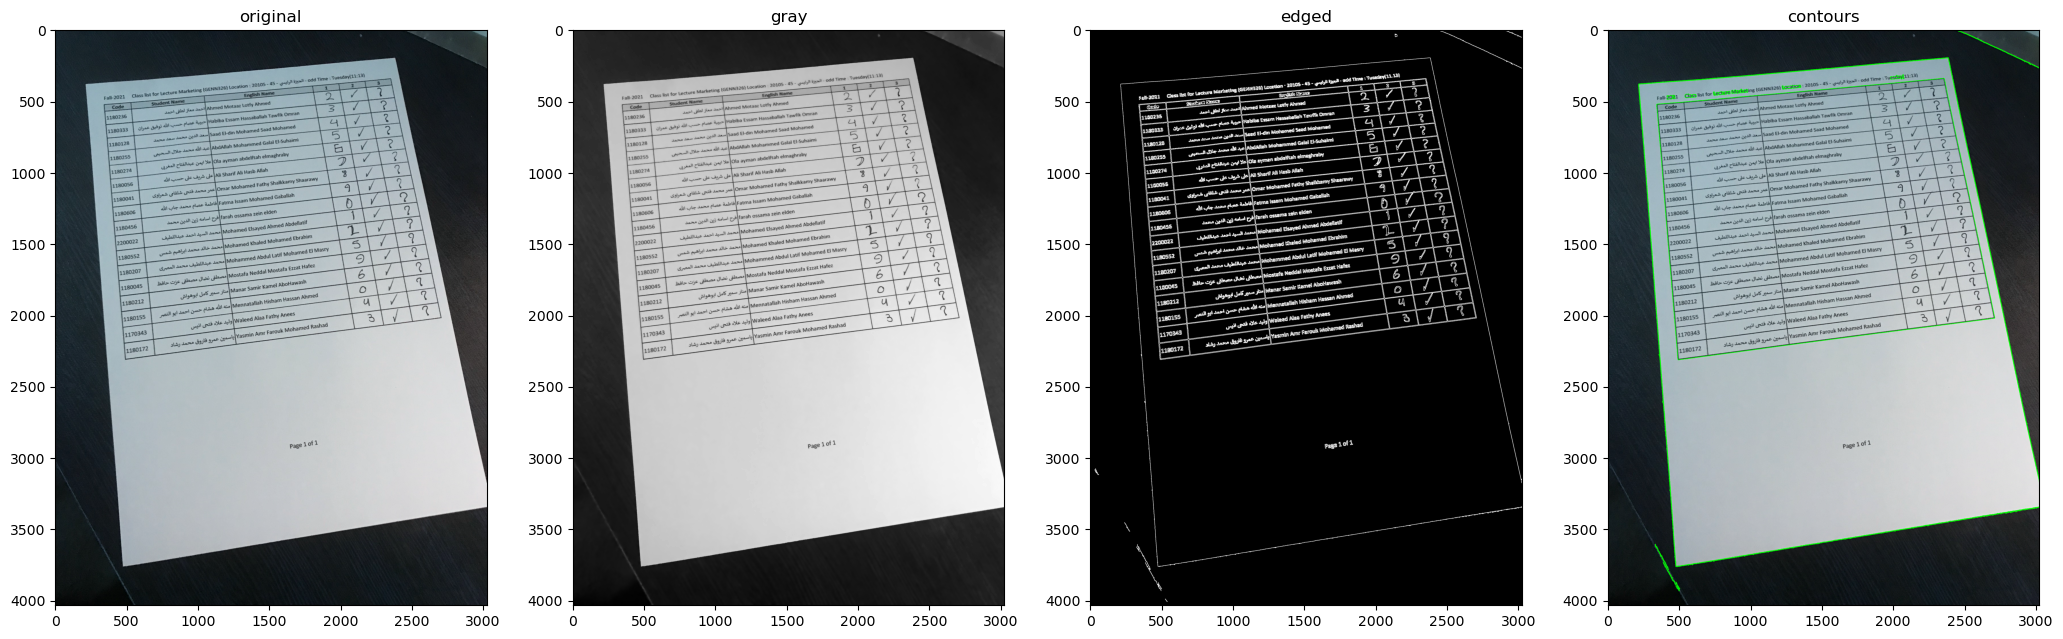

In [265]:
show_images([img_original, gray, edged, img], ['original','gray','edged','contours'])


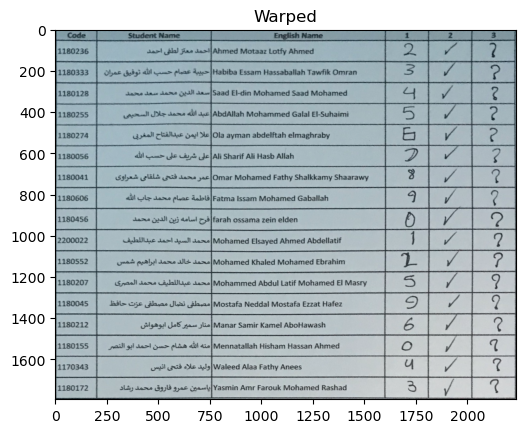

In [266]:
show_images([img_output], ['Warped'])